In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

## Load the nifti file as img:
img=nib.load('DataPaul1ss1regc.nii')


In [2]:
## Convert image data into numpy array:
img_data=img.get_fdata()

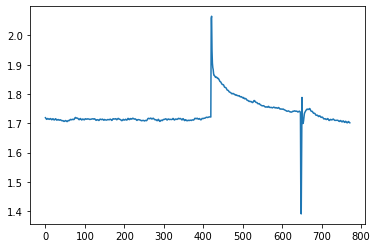

In [25]:
## Plotting mean gray value from all voxels over time
mean_gray_over_time=np.mean(img_data, axis=(0,1,2))
plt.plot(mean_gray_over_time)
plt.show()

In [4]:
def rolling_average(vox_array, n=3) :
    """Returns the rolling average for a 1D array with a window size of n=3"""
    ret = np.cumsum(vox_array, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [19]:
## extract the gray values over time for the first voxel
vox_1=img_data[0,0,0,:]

In [56]:
print(vox_0.shape)

(772,)


In [20]:
## Calculating the rolling average for the first voxel
ra_vox_0=rolling_average(vox_0)

In [21]:
print(ra_vox_0.shape)

(770,)


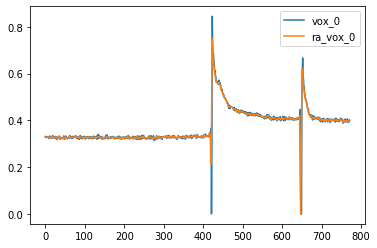

In [58]:
## Plot the curves for the first voxel and rolling average of the first voxel (smoothed curve)
plt.plot(vox_0, label='vox_0')
plt.plot(ra_vox_0, label='ra_vox_0')
plt.legend()
plt.show()

In [60]:
## Reshaping img array into 2D array with all voxels as rows and timeframes as columns
vol_shape = img_data.shape[:-1]
n_vox= np.prod(vol_shape)
vox_over_t=img_data.reshape(n_vox, img_data.shape[-1])

In [ ]:
## Calculating the rolling average for every voxel over time
img_smooth=np.array([])
for i in vox_over_t:
    img_smooth=np.append(img_smooth, rolling_average(i))
img_smooth=img_smooth.reshape(vox_over_t.shape[0],vox_over_t.shape[1]-2)

In [2]:
##Testing reshaping code on small 4D array
test_arr=np.random.rand(270).reshape(3,3,3,10)
test_reshape=test_arr.reshape(27,10)
test_reshape


array([[0.15706411, 0.76018691, 0.83266725, 0.20109936, 0.27444845,
        0.205515  , 0.89960867, 0.31218955, 0.63558074, 0.6712547 ],
       [0.06571353, 0.6906525 , 0.69052129, 0.95940012, 0.50887229,
        0.18540418, 0.26935109, 0.08702187, 0.45855912, 0.68060266],
       [0.07237877, 0.1449723 , 0.40595289, 0.11913727, 0.68912625,
        0.0899491 , 0.06154352, 0.62026789, 0.94990207, 0.27602109],
       [0.8700594 , 0.63896981, 0.46531521, 0.11971446, 0.28943619,
        0.36701048, 0.08133514, 0.10699987, 0.14306163, 0.81935843],
       [0.07014788, 0.96204041, 0.63349769, 0.22605058, 0.99479987,
        0.58590391, 0.23169242, 0.29619044, 0.18340346, 0.04330841],
       [0.11176987, 0.91412857, 0.66656169, 0.03265975, 0.03903315,
        0.06202276, 0.2792879 , 0.58325726, 0.68490226, 0.30815962],
       [0.16096418, 0.63807485, 0.2389471 , 0.44693842, 0.40896853,
        0.7001767 , 0.64491895, 0.64765509, 0.79889164, 0.07253606],
       [0.33361459, 0.86226969, 0.4984788

In [45]:
## Testing loop to calculate rolling average for every voxel 
smooth=np.array([])
for i in test_reshape:
    smooth=np.append(smooth, rolling_average(i))
smooth=smooth.reshape(27,8)
smooth

array([[0.58330609, 0.59798451, 0.43607169, 0.22702094, 0.45985737,
        0.47243774, 0.61579299, 0.539675  ],
       [0.48229577, 0.7801913 , 0.7195979 , 0.55122553, 0.32120919,
        0.18059238, 0.27164403, 0.40872788],
       [0.20776799, 0.22335416, 0.4047388 , 0.29940421, 0.28020629,
        0.2572535 , 0.54390449, 0.61539702],
       [0.65811481, 0.40799983, 0.29148862, 0.25872038, 0.24592727,
        0.18511516, 0.11046555, 0.35647331],
       [0.55522866, 0.60719622, 0.61811605, 0.60225145, 0.60413207,
        0.37126226, 0.23709544, 0.17430077],
       [0.56415338, 0.53778334, 0.24608486, 0.04457189, 0.12678127,
        0.30818931, 0.51581581, 0.52543971],
       [0.34599538, 0.44132012, 0.36495135, 0.51869455, 0.58468806,
        0.66425025, 0.69715523, 0.50636093],
       [0.5647877 , 0.72865086, 0.44573584, 0.32843768, 0.34946928,
        0.67468908, 0.68319937, 0.40334369],
       [0.7721898 , 0.71544049, 0.45850761, 0.34871211, 0.21999233,
        0.22599444, 0.164441

In [46]:
## Testing code for filling the first two values that are missing after calculating the rolling average with the first average value, to obtain an arry with the same number of timeframes as the original data
for i in range (1):
    smooth=np.insert(smooth, 0, smooth[:,0], axis=1)
    smooth=np.insert(smooth, -1, smooth[:,-1], axis=1)
smooth

array([[0.58330609, 0.58330609, 0.59798451, 0.43607169, 0.22702094,
        0.45985737, 0.47243774, 0.61579299, 0.539675  , 0.539675  ],
       [0.48229577, 0.48229577, 0.7801913 , 0.7195979 , 0.55122553,
        0.32120919, 0.18059238, 0.27164403, 0.40872788, 0.40872788],
       [0.20776799, 0.20776799, 0.22335416, 0.4047388 , 0.29940421,
        0.28020629, 0.2572535 , 0.54390449, 0.61539702, 0.61539702],
       [0.65811481, 0.65811481, 0.40799983, 0.29148862, 0.25872038,
        0.24592727, 0.18511516, 0.11046555, 0.35647331, 0.35647331],
       [0.55522866, 0.55522866, 0.60719622, 0.61811605, 0.60225145,
        0.60413207, 0.37126226, 0.23709544, 0.17430077, 0.17430077],
       [0.56415338, 0.56415338, 0.53778334, 0.24608486, 0.04457189,
        0.12678127, 0.30818931, 0.51581581, 0.52543971, 0.52543971],
       [0.34599538, 0.34599538, 0.44132012, 0.36495135, 0.51869455,
        0.58468806, 0.66425025, 0.69715523, 0.50636093, 0.50636093],
       [0.5647877 , 0.5647877 , 0.7286508

In [34]:
## alternative solutions that retains the shape of the array (Does'nt cut of the first and the last number)
def moving_average(x, w=3):
    return np.convolve(x, np.ones(w), 'same') / w

smooth_conv=np.array([])
for i in test_reshape:
    smooth_conv=np.append(smooth_conv, moving_average(i))
smooth_conv=smooth_conv.reshape(27,10)
smooth_conv

array([[0.30575034, 0.58330609, 0.59798451, 0.43607169, 0.22702094,
        0.45985737, 0.47243774, 0.61579299, 0.539675  , 0.43561181],
       [0.25212201, 0.48229577, 0.7801913 , 0.7195979 , 0.55122553,
        0.32120919, 0.18059238, 0.27164403, 0.40872788, 0.37972059],
       [0.07245036, 0.20776799, 0.22335416, 0.4047388 , 0.29940421,
        0.28020629, 0.2572535 , 0.54390449, 0.61539702, 0.40864106],
       [0.50300974, 0.65811481, 0.40799983, 0.29148862, 0.25872038,
        0.24592727, 0.18511516, 0.11046555, 0.35647331, 0.32080669],
       [0.34406276, 0.55522866, 0.60719622, 0.61811605, 0.60225145,
        0.60413207, 0.37126226, 0.23709544, 0.17430077, 0.07557062],
       [0.34196615, 0.56415338, 0.53778334, 0.24608486, 0.04457189,
        0.12678127, 0.30818931, 0.51581581, 0.52543971, 0.33102062],
       [0.26634634, 0.34599538, 0.44132012, 0.36495135, 0.51869455,
        0.58468806, 0.66425025, 0.69715523, 0.50636093, 0.2904759 ],
       [0.39862809, 0.5647877 , 0.7286508

<function matplotlib.pyplot.show(*args, **kw)>

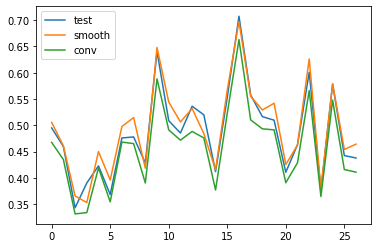

In [47]:
plt.plot(test_reshape.mean(axis=1), label='test')
plt.plot(smooth.mean(axis=1), label='smooth')
plt.plot(smooth_conv.mean(axis=1), label='conv')
plt.legend()
plt.show

In [52]:
## Testing code for reshaping data back into 4D and calculating df over f
smooth_4d=smooth.reshape(3,3,3,10)
df_over_f=(test_arr-smooth_4d)/smooth_4d
df_over_f

array([[[[-0.13819073,  0.31400173, -0.175811  , -0.16556986,
          -0.9848688 ,  0.99291232, -0.27640491,  0.36714735,
          -0.76225333, -0.11772056],
         [-0.17095562, -0.20798389,  0.37893951, -0.30615927,
          -0.73323363,  0.99104745,  0.59127068,  0.32651259,
          -0.16367659, -0.24635759],
         [-0.06160116,  0.4051532 , -0.34355204, -0.52054904,
           0.33925424, -0.3268296 ,  0.63550091,  0.34762328,
          -0.37984666, -0.59818534]],

        [[-0.64899619,  0.51111273,  0.13788346, -0.48445722,
           0.16578116, -0.19018103, -0.26524589,  0.1806823 ,
           0.24539373, -0.53253605],
         [-0.38146615,  0.69761091, -0.31614476, -0.79190771,
           1.00249098,  0.38606242, -0.73730985, -0.80453548,
           1.08220484,  0.66583827],
         [-0.19710617,  0.60369999, -0.40659382,  0.41455661,
           0.33399962, -0.60145874, -0.04511755, -0.53933823,
           0.562045  ,  0.60477624]],

        [[ 0.02900835,  0.4440

<function matplotlib.pyplot.show(*args, **kw)>

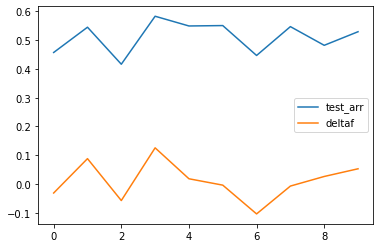

In [57]:
## Plotting test data
plt.plot(test_arr.mean(axis=(0,1,2)), label='test_arr')
plt.plot(df_over_f.mean(axis=(0,1,2)), label='deltaf')
plt.legend()
plt.show